In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
def load_data(data_path):
    """
    Method given with the assignment
    """
    FEATURES = range(2, 33)
    N_TIME_SERIES = 3500

    # Create the training and testing samples
    LS_path = os.path.join(data_path, 'LS')
    TS_path = os.path.join(data_path, 'TS')
    X_train, X_test = [np.zeros((N_TIME_SERIES, (len(FEATURES) * 512))) for i in range(2)]

    for f in FEATURES:
        data = np.loadtxt(os.path.join(LS_path, 'LS_sensor_{}.txt'.format(f)))
        X_train[:, (f-2)*512:(f-2+1)*512] = data
        data = np.loadtxt(os.path.join(TS_path, 'TS_sensor_{}.txt'.format(f)))
        X_test[:, (f-2)*512:(f-2+1)*512] = data
    
    y_train = np.loadtxt(os.path.join(LS_path, 'activity_Id.txt'))

    print('X_train size: {}.'.format(X_train.shape))
    print('y_train size: {}.'.format(y_train.shape))
    print('X_test size: {}.'.format(X_test.shape))

    return X_train, y_train, X_test

In [3]:
def write_submission(y, where, submission_name='toy_submission.csv'):

    os.makedirs(where, exist_ok=True)

    SUBMISSION_PATH = os.path.join(where, submission_name)
    if os.path.exists(SUBMISSION_PATH):
        os.remove(SUBMISSION_PATH)

    y = y.astype(int)
    outputs = np.unique(y)

    # Verify conditions on the predictions
    if np.max(outputs) > 14:
        raise ValueError('Class {} does not exist.'.format(np.max(outputs)))
    if np.min(outputs) < 1:
        raise ValueError('Class {} does not exist.'.format(np.min(outputs)))
    
    # Write submission file
    with open(SUBMISSION_PATH, 'a') as file:
        n_samples = len(y)
        if n_samples != 3500:
            raise ValueError('Check the number of predicted values.')

        file.write('Id,Prediction\n')

        for n, i in enumerate(y):
            file.write('{},{}\n'.format(n+1, int(i)))

    print('Submission {} saved in {}.'.format(submission_name, SUBMISSION_PATH))


In [4]:
X_train, y_train, X_test = load_data('data')

X_train size: (3500, 15872).
y_train size: (3500,).
X_test size: (3500, 15872).


First test with a random forest composed of 10 estimators and min_sample_split=200

In [5]:
forest = RandomForestClassifier(n_estimators=10, min_samples_split=200, n_jobs=-1)
scores = cross_val_score(forest, X_train, y_train, cv=10, n_jobs=-1)
print(scores)
print(scores.mean())

[0.74857143 0.75142857 0.76571429 0.75714286 0.73142857 0.73142857
 0.76571429 0.72       0.74       0.72285714]
0.7434285714285714


Second test with a random forest composed of 50 estimators and min_sample_split=200

In [6]:
forest = RandomForestClassifier(n_estimators=50, min_samples_split=200, n_jobs=-1)
scores = cross_val_score(forest, X_train, y_train, cv=10, n_jobs=-1)
print(scores)
print(scores.mean())

[0.78       0.77714286 0.76285714 0.78285714 0.75714286 0.73714286
 0.76571429 0.74857143 0.76571429 0.79142857]
0.766857142857143


Third test with a random forest composed of 50 estimators and min_sample_split=100

In [7]:
forest = RandomForestClassifier(n_estimators=50, min_samples_split=100, n_jobs=-1)
scores = cross_val_score(forest, X_train, y_train, cv=10, n_jobs=-1)
print(scores)
print(scores.mean())

[0.86       0.87142857 0.85142857 0.86857143 0.86285714 0.84857143
 0.86       0.84571429 0.85428571 0.86285714]
0.8585714285714285


Fourth test with a random forest composed of 100 estimators and min_sample_split=50

In [8]:
forest = RandomForestClassifier(n_estimators=100, min_samples_split=50, n_jobs=-1)
scores = cross_val_score(forest, X_train, y_train, cv=10, n_jobs=-1)
print(scores)
print(scores.mean())

[0.91428571 0.9        0.92       0.93142857 0.91142857 0.87142857
 0.91142857 0.89428571 0.9        0.90285714]
0.9057142857142857


Study the accuracy of the forest based on the number of trees (min_sample_split = 50)

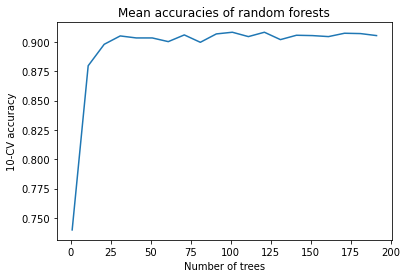

In [10]:
forest_sizes = []
accuracies = []
for i in range(1, 201, 10):
    forest_sizes.append(i)
    forest = RandomForestClassifier(n_estimators=i, min_samples_split=50, n_jobs=-1)
    scores = cross_val_score(forest, X_train, y_train, cv=10, n_jobs=-1)
    accuracies.append(scores.mean())
plt.plot(forest_sizes, accuracies)
plt.title("Mean accuracies of random forests")
plt.xlabel("Number of trees")
plt.ylabel("10-CV accuracy")
plt.savefig("rf_basic_accuracies.png")
plt.show()

We can see on this graph that for number of trees greater or equal to 30, we reach a plateau. Let us set the number of trees to 40 and study the accuracy depending on the value of min_sample_split.

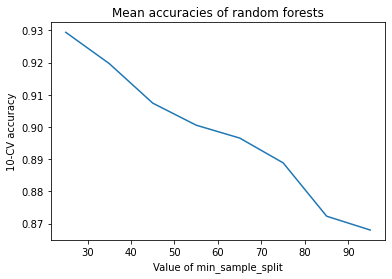

In [14]:
mss = []
accuracies = []
for i in range (25, 100, 10):
    mss.append(i)
    forest = RandomForestClassifier(n_estimators=40, min_samples_split=i, n_jobs=-1)
    scores = cross_val_score(forest, X_train, y_train, cv=10, n_jobs=-1)
    accuracies.append(scores.mean())
plt.plot(mss, accuracies)
plt.title("Mean accuracies of random forests")
plt.xlabel("Value of min_sample_split")
plt.ylabel("10-CV accuracy")
plt.savefig("rf_40_accuracies.png")
plt.show()

Based on the previous graph, compute the mean accuracy with 10-CV for a random forest of 40 trees and min_sample_split=25

In [17]:
forest = RandomForestClassifier(n_estimators=40, min_samples_split=25, n_jobs=-1)
scores = cross_val_score(forest, X_train, y_train, cv=10, n_jobs=-1)
print(scores)
print(scores.mean())

[0.93428571 0.94       0.92571429 0.94571429 0.94857143 0.90857143
 0.91142857 0.91714286 0.92       0.92857143]
0.9280000000000002
